In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [70]:
test_path = 'Test.csv'
train_path = 'Train.csv'

In [71]:
df_test = pd.read_csv(test_path)
df_train = pd.read_csv(train_path)

In [72]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


asumo que sera igual el train

In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [74]:
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])


Ever_Married       140
Graduated           78
Profession         124
Work_Experience    829
Family_Size        335
Var_1               76
dtype: int64


voy a eliminar la columna ID porque realmente no nos sirve de nada para esto

In [75]:
df_train = df_train.drop(columns='ID')

In [76]:
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


Imputacion de valores faltantes en columnas

In [77]:
df_train['Work_Experience'].fillna(df_train['Work_Experience'].median(), inplace=True)
df_train['Family_Size'].fillna(df_train['Family_Size'].median(), inplace=True)

C:\Users\Xián\AppData\Local\Temp\ipykernel_10688\548219204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Work_Experience'].fillna(df_train['Work_Experience'].median(), inplace=True)
C:\Users\Xián\AppData\Local\Temp\ipykernel_10688\548219204.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

En caso de las columnas categoricas vamos a utilizar la moda para poder completar las columnas

In [78]:
categorical_cols = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']
for col in categorical_cols:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)


C:\Users\Xián\AppData\Local\Temp\ipykernel_10688\1748273773.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(df_train[col].mode()[0], inplace=True)


voy a volver a comprobar 

In [79]:
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

Series([], dtype: int64)


Perfecto, no vamos a necesitar mucho mas que convertir las categoricas a numericas, utilizaremos One hot encoding

In [80]:
df_train_encoded = pd.get_dummies(df_train, columns=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation'], 
                            drop_first=True)

Estandarizacion de datos

In [81]:
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_train_encoded)

Aplico PCA y analizamos varianza de paso

In [82]:
pca = PCA()
pca.fit(df_train_scaled)
varianza_explained = pca.explained_variance_ratio_.cumsum()


Graficando

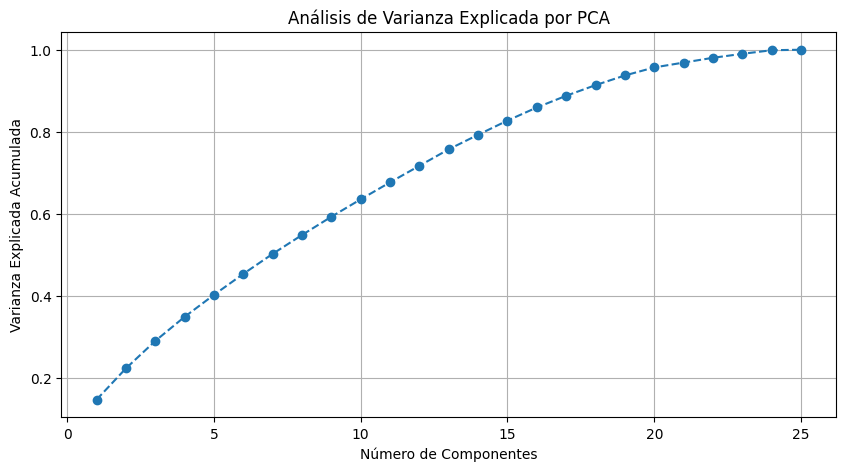

In [83]:
# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(varianza_explained) + 1), varianza_explained, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Análisis de Varianza Explicada por PCA')
plt.grid()
plt.show()

Podem9os observar que los primeros componentes absorven una mayor varianza, mientras que a partir de los 20 componentes tenemos mas del 95 de varianza asi que cogemos desde ahi

In [84]:
componentes_optimos = np.argmax(varianza_explained>= 0.95) + 1

In [85]:
pca_optimo = PCA(n_components=componentes_optimos)
df_pca = pca_optimo.fit_transform(df_train_scaled)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(componentes_optimos)])


Viendo como funciona, vamos a crear una funcion para la reduccion de dimensionalidad generica para cualquier CSV

Recalco que voy a poner a mayores las importaciones ya que esta celda estara pensada para copiar y pegar y ya

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def pca_pipeline(csv_file, variance_threshold=0.95, output_file='output_pca.csv'):


    df = pd.read_csv(csv_file)
    ### Esto sera para eliminar columnas de tipo ID o algo asi
    id_cols = [col for col in df.columns if 'id' in col.lower()]
    df = df.drop(columns=id_cols, errors='ignore')

    ### Deteccion de columnas
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    ### Completamos con la mediana
    for col in num_cols:
        df[col].fillna(df[col].median(), inplace=True)

    #### para categoricas utilizar la moda
    for col in cat_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    ### Utilizamos one hot encoding
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    ### Estandarizar los datos
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_encoded)

    ### Aplicar PCA y analizar la varianza explicada
    pca = PCA()
    pca.fit(df_scaled)
    explained_variance = pca.explained_variance_ratio_.cumsum()

    ### Graficamos
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
    plt.xlabel('Número de Componentes')
    plt.ylabel('Varianza Explicada Acumulada')
    plt.title('Análisis de Varianza Explicada por PCA')
    plt.grid()
    plt.show()

    ### Numero de componentes
    n_components_optimal = np.argmax(explained_variance >= variance_threshold) + 1
    print(f'Seleccionando {n_components_optimal} componentes principales que explican al menos {variance_threshold*100:.2f}% de la varianza.')

    ### PCA con numero optimo de componentes
    pca_optimal = PCA(n_components=n_components_optimal)
    df_pca = pca_optimal.fit_transform(df_scaled)

    # Convertir a DataFrame
    df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components_optimal)])

    ### Guardar dataset reducido
    df_pca.to_csv(output_file, index=False)
    

    return df_pca, n_components_optimal




Vamos a ahcer un ejemplo de uso con test ya que no quiero hacer lo mismo que con test

C:\Users\Xián\AppData\Local\Temp\ipykernel_10688\117612104.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Xián\AppData\Local\Temp\ipykernel_10688\117612104.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

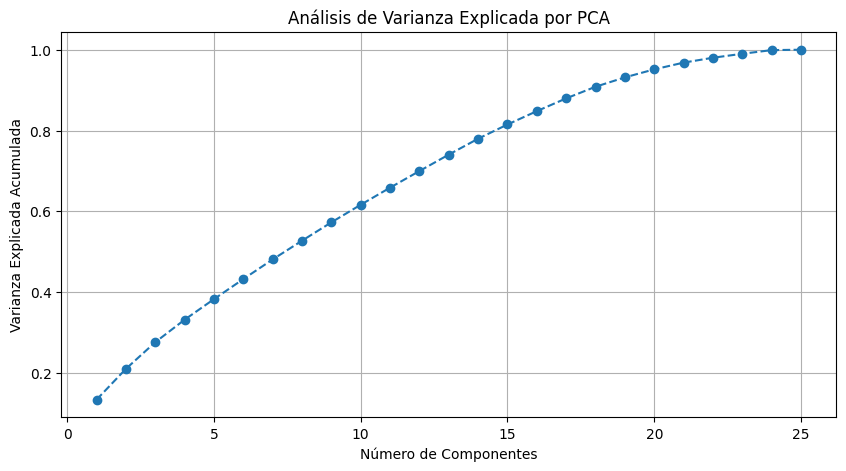

Seleccionando 20 componentes principales que explican al menos 95.00% de la varianza.


In [87]:
df_pca, n_components = pca_pipeline('Test.csv', variance_threshold=0.95, output_file='test_pca.csv')


In [88]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.382199,1.102825,-2.100987,-0.164720,-0.385838,-2.367391,-0.517613,-0.125838,-0.029484,-0.747416,0.330020,-1.664940,-0.632586,1.501754,-0.453619,-0.422430,-1.027202,0.121016,-0.286721,0.350686
1,-0.094757,0.273558,1.382309,-0.786895,1.002513,-0.116380,0.182334,0.365261,-0.607648,-0.679034,0.164644,-0.556294,-0.091004,-0.058529,0.156253,0.079137,2.250651,1.711715,-0.377773,-0.602029
2,0.858178,1.006037,-0.313193,0.882860,-0.711829,-0.466769,-0.029304,-0.313351,-0.055340,0.079982,-0.134998,0.027485,-0.011908,0.062889,0.271772,-0.157411,-1.166481,-0.356473,-0.675111,-1.666538
3,2.772559,-1.233064,1.843554,-1.825438,2.018745,-1.081083,-2.306571,0.093291,-1.374151,0.131865,0.118114,-0.056966,0.251692,-0.428573,-1.918382,2.058267,-0.539764,-0.483417,-0.811344,-0.693417
4,-1.924621,0.388288,0.372499,0.784072,-0.285008,-1.220539,-0.560524,-0.678686,-0.729529,3.069219,1.298767,2.580612,-1.410000,1.881741,0.936849,0.295548,-0.139316,-0.388841,0.082076,-0.052794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,-2.162008,0.703926,1.380605,-1.184916,-0.197749,-1.200110,-1.176554,0.251637,-2.241439,-0.428723,-0.166498,-0.373139,0.203038,-0.447720,-0.118498,1.309757,0.979542,1.034162,-0.271649,-0.324703
2623,-0.681190,2.091953,-0.637735,-0.194394,-0.142588,-0.663123,0.606938,1.774205,1.322060,1.341266,-1.278380,-0.066149,0.662749,-0.115802,0.151541,0.366982,-0.463598,-1.282498,-0.296238,0.465324
2624,0.221925,1.851759,-0.781993,-0.549241,-0.330640,0.791206,2.292980,-1.353421,-0.623053,-0.115539,0.643708,0.322899,-0.106021,-0.260282,0.785248,0.356473,-0.306072,-2.046949,0.335799,0.299857
2625,2.258810,-4.212507,0.973981,-0.760133,1.619120,-0.129770,1.567898,-0.072975,-0.842320,0.829150,0.131887,0.234599,1.144611,-0.525741,-1.605147,-0.792581,0.381952,-1.540740,0.714794,0.530123


In [89]:
df_test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


Podemos concluir que se ha aplicado la reduccion de dimensionalidad correctamente ya que se mantienen las filas pero las columnas se hanb expandido y luego contraido

por lo tanto podemos darlo por valido